## Compare Vectorization and List Comprehension


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
'''
Given vector A, calculate B = [A[0]^2, A[1]^2, A[2]^2, A[3]^2]
'''

A = [1, 2, 3, 4]


### 1. List Comprehension
List comprehension is to finish all the calculation inside a list with iteration.

In [2]:
# List comprehension
B = [i**2 for i in A]
print(B)

[1, 4, 9, 16]


### 2. Vectorization
Vectorization is to do the calculation directly to the vector with np.ndarray type. So don't forget to change A into a np.array before using the vectorization. And numpy has lots of function to do different operations. (np.exp(), np.log(), np.dot())

In [7]:
# Vectorization

A = np.array(A)
B = A**2
print(B)

[ 1  4  9 16]


In [8]:

print("Calculate exp of each term in A: \n ", np.exp(A))

print("Calculate log of each term in A: \n ", np.log(A))

print("Calculate cubic of each term in A: \n ", np.power(A, 3))

Calculate exp of each term in A: 
  [ 2.71828183  7.3890561  20.08553692 54.59815003]
Calculate log of each term in A: 
  [0.         0.69314718 1.09861229 1.38629436]
Calculate cubic of each term in A: 
  [ 1  8 27 64]


Also, vectorization in numpy can help you to do more **Vector Operation** like inner product, elementwise product in the future.

In [63]:
"""
Calcualtet the inner product of A = [1, 2, 3] and B = [2, 3, 4]
"""
A = np.array([1, 2, 3])
B = np.array([2, 3, 4])

# List comprehension 
inner_product = sum([A[i]*B[i] for i in range(len(A))])
print('List Comprehension :', str(inner_product))

# Vectorization
inner_product = np.dot(A, B)
print('Vectorization :', str(inner_product))


List Comprehension : 20
Vectorization : 20
List Comprehension: 0.01503s Result: 25082.01799
Vectorization : 0.00852s Result: 25082.01799
Vectorization can get the same result as List Comprehension but save more time. 


### 3. Time comparison between Vectorization and List Comprehension

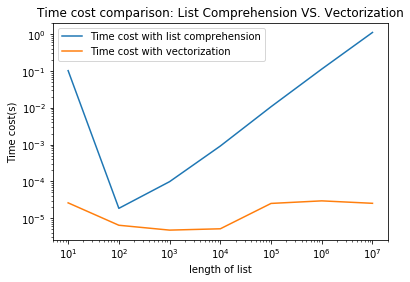

In [41]:
import random
import time

"""
Time comparison for simple operation
"""
nmax = [10**n for n in range(1,8)]
t_list = []
t_array = []
for n in nmax:
    r_list = [random.random() for _ in range(n)]
    r_array = np.array(r)

    t0 = time.perf_counter()
    r_list1 = [i**2 for i in r_list]
    t_list.append(time.perf_counter() - t0)


    t1 = time.perf_counter()
    r_array1 = np.power(r_array, 2)
    t_array.append(time.perf_counter() - t1)

plt.figure()
plt.loglog(nmax, t_list, label = 'Time cost with list comprehension')
plt.loglog(nmax, t_array, label = 'Time cost with vectorization')
plt.title('Time cost comparison: List Comprehension VS. Vectorization')
plt.legend()
plt.xlabel('length of list')
plt.ylabel('Time cost(s)')
plt.show()



In [66]:
"""
Time comparison for vector operation
"""

A = [random.random() for _ in range(100000)]
B = [random.random() for _ in range(100000)]

t0 = time.perf_counter()
i_list = sum([A[i]*B[i] for i in range(len(A))])
t_list = time.perf_counter() - t0

t0 = time.perf_counter()
i_vect = np.dot(A, B)
t_vect = time.perf_counter() - t0

print('List Comprehension - Time cost : %.5fs'%t_list ,'Result: %.5f'%i_list)
print('Vectorization - Time cost : %.5fs'%t_vect, 'Result: %.5f'%i_vect)


List Comprehension - Time cost : 0.01705s Result: 25120.44855
Vectorization - Time cost : 0.00851s Result: 25120.44855


Vectorization can get the same result as List Comprehension but save more time. 
So we prefer to choose **Vectorization** for further vector operations. 

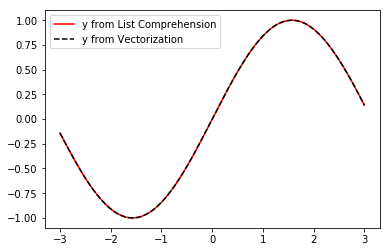

Running time for List Comprehension:  0.002321 
Running time for Vectorization:  0.000528  


In [65]:
"""
Time comparison for drawing plot.
Draw a y = sin(t) curve
"""
import time
t = np.linspace(-3, 3, 10001)

start = time.perf_counter()
y1 = [math.sin(i) for i in t]
t1 = time.perf_counter() - start

start = time.perf_counter()
y2 = np.sin(t)
t2 = time.perf_counter() - start

plt.figure()
plt.plot(t, y1, label = "y from List Comprehension", linestyle = '-', color = 'red')
plt.plot(t, y2, label = "y from Vectorization", linestyle = '--', color = 'black')
plt.legend()
plt.show()

print("Running time for List Comprehension:  %f "%t1)
print("Running time for Vectorization:  %f  "%t2)